# Bay Area Rapid Transit (BART) Map and Routes

In [22]:
display(HTML("""<a href="https://medium.com/@atmikapai/the-history-of-bay-area-rapid-transit-bart-92a1818f6fc9">Link to Medium Article about History of Bay Area Rapid Transit</a>"""));

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import zipfile
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
import fiona
import shapely.wkt
import shapefile as shp
from IPython.display import display, HTML

In [24]:
bart_location = pd.read_csv('BART_Station_location.csv')

#Pulling station names and creating station dictinary to toggle between station names and their abbreviations
station_name = bart_location[['Abbreviation', 'Name']].set_index('Abbreviation')
station_names = station_name.to_dict()['Name']
station_abbrv = {v : k for k, v in station_names.items()}

#Plotting bay area counties 
bart_future_stations = gpd.GeoDataFrame(bart_location, geometry=gpd.points_from_xy(bart_location.Long, bart_location.Lat), crs="EPSG:4326") 
bart_location = bart_future_stations.loc[bart_future_stations['Year Built'] != 2030]

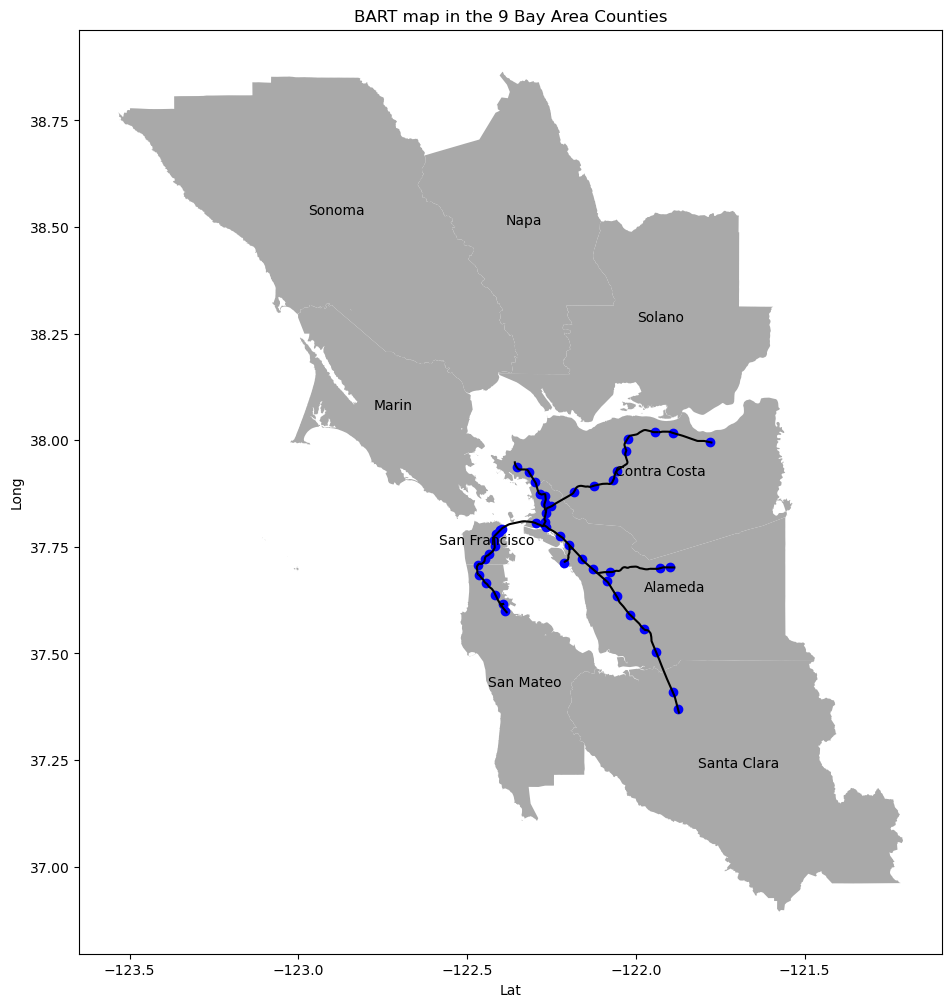

In [25]:
street_map_bay_area = gpd.read_file('Maps/Bay_Area_Counties-polygon.shp')

fig, ax = plt.subplots(figsize=(20,12))
street_map_bay_area.plot(ax=ax, alpha=1,linewidth=30, color='white')
gpd.read_file('Maps/Bay_Area_Counties-polygon.dbf').plot(ax=ax,  alpha=1,linewidth=30, color='darkgrey')
bart_location.plot(ax=ax, color = 'blue')
gpd.read_file('Maps/BART_Track-line.shp').plot(ax=ax, color='black')


street_map_bay_area.apply(lambda x: ax.annotate(text=x['county'], xy=x.geometry.centroid.coords[0], ha='center'),axis=1);
plt.title('BART map in the 9 Bay Area Counties');
plt.xlabel('Lat');
plt.ylabel('Long');

In [26]:
#function to plot BART map
def plotter(df, column_name='', title=''):
    df2 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Long, df.Lat), crs="EPSG:4326")
    if column_name == '':
        ax = df2.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=1.0, color='steelblue')
    else:
        ax = df2.to_crs(epsg=3857).plot(figsize=(10, 10), alpha=1.0, column = column_name, legend = True)
    gpd.read_file('Maps/BART_Track-line.shp').to_crs(epsg=3857).plot(ax=ax, alpha=0.4, edgecolor='black')
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
    plt.title(title)
    plt.xlabel('Lat')
    plt.ylabel('Long')
    return plt.show()

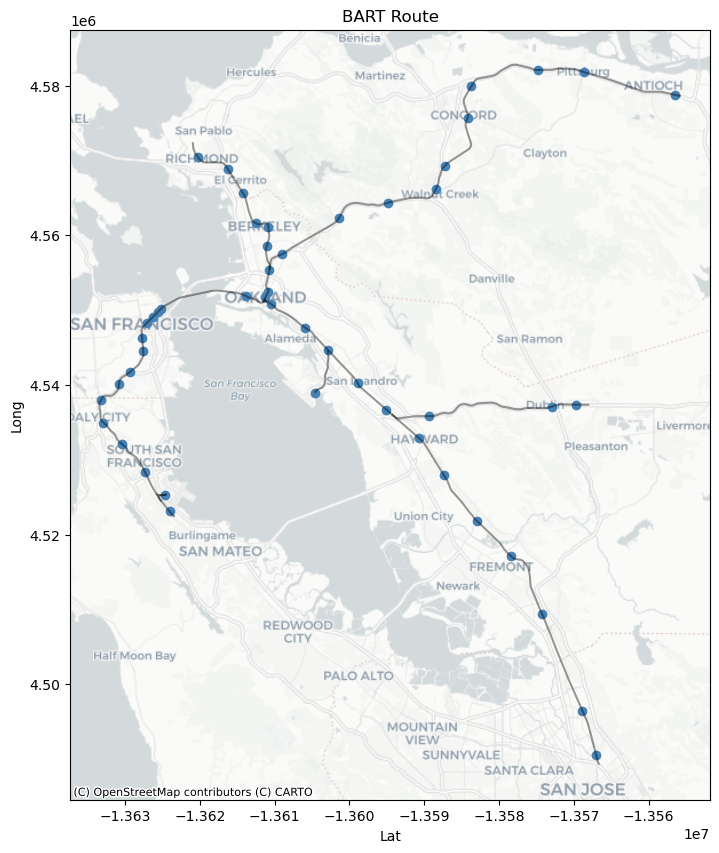

In [27]:
plotter(bart_location, '','BART Route')

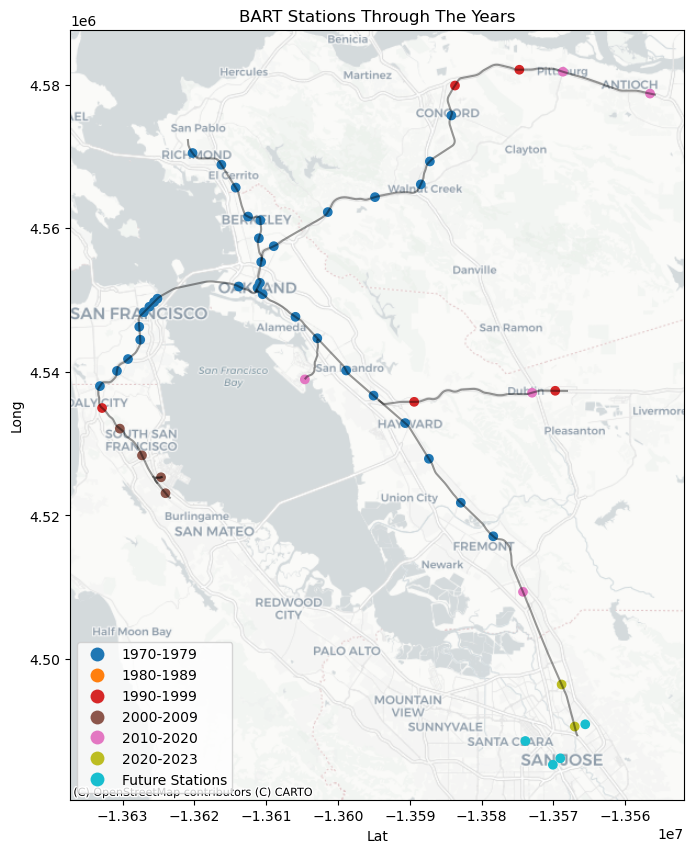

In [28]:
bart_future_stations['Year Built3'] = pd.cut(bart_future_stations['Year Built'],bins=[1970,1979, 1989 ,1999,2009,2019, 2023, 2035],
                                      labels=['1970-1979', '1980-1989', '1990-1999', 
                                              '2000-2009', '2010-2020', '2020-2023','Future Stations'])

plotter(bart_future_stations, 'Year Built3', 'BART Stations Through The Years')